In [1]:
import pandas as pd
import pymysql
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Database Connection Parameters
disease_checker = {
    'host': 'localhost',
    'user': 'root',
    'password': 'Alayande1$',
    'database': 'disease_checker',
}


#Connecting to the SQL Database
conn = pymysql.connect(**disease_checker)

In [3]:
covid_query = "SELECT * FROM covid"

In [4]:
covid_df = pd.read_sql(covid_query, conn)

C:\Users\PC\AppData\Local\Temp\ipykernel_14880\3317972950.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  covid_df = pd.read_sql(covid_query, conn)


In [5]:
covid_df = covid_df.replace({'Yes': 1, 'No': 2, 'Male': 1, 'Female': 2, 'High': 1, 'Medium': 2, 'Low': 3, 'Negative': 4, 'Critical': 5})

In [6]:
correlation_matrix = covid_df.corr()

# Display the correlation matrix
print(correlation_matrix)

                   id    Gender  Diarrhea     Fever     Cough  Headache  \
id           1.000000 -0.007728  0.007188 -0.010745 -0.010433  0.009690   
Gender      -0.007728  1.000000 -0.000379 -0.000005 -0.022445 -0.004791   
Diarrhea     0.007188 -0.000379  1.000000  0.000406 -0.016353 -0.006010   
Fever       -0.010745 -0.000005  0.000406  1.000000 -0.012013 -0.021598   
Cough       -0.010433 -0.022445 -0.016353 -0.012013  1.000000 -0.031182   
Headache     0.009690 -0.004791 -0.006010 -0.021598 -0.031182  1.000000   
Sore_Throat  0.009834 -0.005574 -0.012429 -0.007193 -0.016741  0.005588   
Body_Ache   -0.016833  0.003579 -0.013577  0.001994 -0.004448  0.018010   
Vomiting     0.003412 -0.020838  0.010041  0.007190 -0.002484  0.017617   
Severity    -0.035321 -0.003907  0.123133  0.107822  0.091255  0.112776   

             Sore_Throat  Body_Ache  Vomiting  Severity  
id              0.009834  -0.016833  0.003412 -0.035321  
Gender         -0.005574   0.003579 -0.020838 -0.003907  


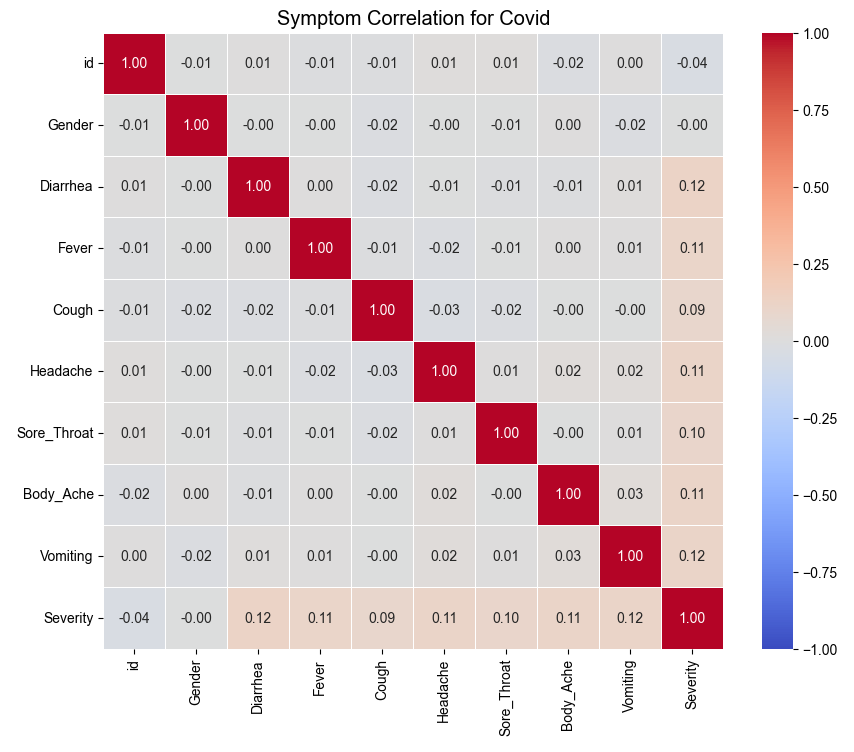

In [7]:
plt.figure(figsize=(10, 8), dpi=100)

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=.5, vmin=-1, vmax=1)

# Set the font size for the numbers
sns.set(font_scale=1.2)

# Set a title for the heatmap
plt.title("Symptom Correlation for Covid")

# Show the heatmap
plt.show()